In [ ]:
import numpy as np
import random
import math

In [ ]:
# Task generation 


def gen_ripoll(nsets, MaxCompute, MaxSlack, Maxdelay, target_util):

    # Args:
    #     - `nsets`: Number of tasksets to generate.( for multiple use code at the last cell )
    #     - `MaxCompute`: Maximum computation time of a task.
    #     - `MaxSlack`: Maximum slack time.
    #     - `Maxdelay`: Maximum delay after the deadline.
    #     - `target_util`: Total utilization to reach.

    
    task_set = []
    total_util = 0.0
    t = 0
    T = 1
    while total_util < target_util:

        computation = random.randint(10, int(MaxCompute/10))
        computation = computation*10
        # arrival_time = int(random.randint(0, int(computation/5))/10)*10
        deadline = computation + 10*random.randint(0, int(MaxSlack/10))
        period = deadline + 10*random.randint(0, int(Maxdelay/10))
        BBs = random.randint(5,10)
        A = []
        for i in range(BBs-1):
            A.append(random.randint(1,10))
        b = []
        block = []
        x = int(computation/BBs)
        p = x-20
        sum = 0
        if(x-20 < 0): p = 0
        for i in range(BBs-1):
          y = random.randint(p,x+20)
          sum = sum + y
          b.append(y)

          block.append("T{} bb{}".format(T,i+1))      
        b.append(computation - sum)
        t = t + computation

        task_set.append((period, computation, deadline,BBs,b,A,block))
        # task_set.append((period, computation, deadline,BBs,b,A,block,arrival_time))
        total_util += float(computation) / period
        T = T+1
    return task_set,t

set1,totalComputation = gen_ripoll(1,1000,2000,1500,0.9)
set_e = set1.copy()
set_r = set1.copy()

print(set1) 
print(totalComputation)

[(2590, 170, 1970, 7, [31, 5, 36, 5, 29, 18, 46], [6, 7, 7, 8, 8, 10], ['T1 bb1', 'T1 bb2', 'T1 bb3', 'T1 bb4', 'T1 bb5', 'T1 bb6']), (1390, 270, 930, 9, [47, 40, 35, 16, 19, 22, 14, 11, 66], [2, 8, 5, 1, 3, 1, 5, 9], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7', 'T2 bb8']), (2870, 510, 1780, 5, [86, 113, 117, 94, 100], [8, 10, 9, 7], ['T3 bb1', 'T3 bb2', 'T3 bb3', 'T3 bb4']), (2260, 220, 2030, 7, [19, 12, 43, 19, 51, 12, 64], [3, 7, 9, 2, 1, 6], ['T4 bb1', 'T4 bb2', 'T4 bb3', 'T4 bb4', 'T4 bb5', 'T4 bb6']), (1810, 450, 1580, 5, [80, 91, 100, 92, 87], [3, 3, 2, 8], ['T5 bb1', 'T5 bb2', 'T5 bb3', 'T5 bb4']), (3450, 820, 2120, 6, [120, 138, 149, 129, 132, 152], [5, 5, 8, 1, 6], ['T6 bb1', 'T6 bb2', 'T6 bb3', 'T6 bb4', 'T6 bb5'])]
2440


In [ ]:
# Prioritising according to EDF and RM

# For EDF
n = len(set_e)

for i in range(n-1):
    for j in range(0, n-i-1):
        if set_e[j][2] > set_e[j + 1][2]:
            set_e[j], set_e[j + 1] = set_e[j + 1], set_e[j]
print("According to EDF, priority order: ")
print(set_e)

# For FP, RM
n = len(set_r)

for i in range(n-1):
    for j in range(0, n-i-1):
        if set_r[j][0] > set_r[j + 1][0]:
            set_r[j], set_r[j + 1] = set_r[j + 1], set_r[j]
print("According to RM, priority order: ")


print(set_r)



According to EDF, priority order: 
[(1390, 270, 930, 9, [47, 40, 35, 16, 19, 22, 14, 11, 66], [2, 8, 5, 1, 3, 1, 5, 9], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7', 'T2 bb8']), (1810, 450, 1580, 5, [80, 91, 100, 92, 87], [3, 3, 2, 8], ['T5 bb1', 'T5 bb2', 'T5 bb3', 'T5 bb4']), (2870, 510, 1780, 5, [86, 113, 117, 94, 100], [8, 10, 9, 7], ['T3 bb1', 'T3 bb2', 'T3 bb3', 'T3 bb4']), (2590, 170, 1970, 7, [31, 5, 36, 5, 29, 18, 46], [6, 7, 7, 8, 8, 10], ['T1 bb1', 'T1 bb2', 'T1 bb3', 'T1 bb4', 'T1 bb5', 'T1 bb6']), (2260, 220, 2030, 7, [19, 12, 43, 19, 51, 12, 64], [3, 7, 9, 2, 1, 6], ['T4 bb1', 'T4 bb2', 'T4 bb3', 'T4 bb4', 'T4 bb5', 'T4 bb6']), (3450, 820, 2120, 6, [120, 138, 149, 129, 132, 152], [5, 5, 8, 1, 6], ['T6 bb1', 'T6 bb2', 'T6 bb3', 'T6 bb4', 'T6 bb5'])]
According to RM, priority order: 
[(1390, 270, 930, 9, [47, 40, 35, 16, 19, 22, 14, 11, 66], [2, 8, 5, 1, 3, 1, 5, 9], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7', 'T2 bb8']), 

In [ ]:
# Required functions

# Computing Q 
def Compute_Qk(Q,T):
  b = [] 
  # b.append(0)                            # Array containing sizes of basic blocks (i.e., b1 = b[1]). b = [0,2,2,2,1,2,3]
  for i in range(len(T[4])):
      b.append(T[4][i])


  OH = []
  OH.append(0)                           # Array containing overheads, for OH[0] = 0 and OH[k] = preemption overhead before k+1. OH = [0,1,2,3,3,1]
  for i in range(len(T[5])):
      OH.append(T[5][i])
  
  y = []
  for i in range(len(b)):
    p = b[i] + OH[i]
    y.append(p)

  Max = y[0]
  for i in range(len(y)):
    if(y[i]>=Max): Max = y[i]
  r = int(T[1]/T[3])
  Qnew = Max + r
  # if(Qnew > Q): return Q
  # else: return Qnew
  return Qnew



def Compute_DBF(a,T,D,C):
  D = (1 + int((a-D)/T))*C
  return D



def find_min_DBF(a,Ti,Di,Ci):
  A = []
  for i in range(len(a)):
    l = 0
    for j in range(1,len(Ti)):
      D = Compute_DBF(a[i],Ti[j],Di[j],Ci[j])
      l = l+D
    A.append(a[i] - l)
  min = A[0]
  for i in range(len(A)):
    if(min > A[i]): min = A[i]
  
  return min


  
def Compute_Qk_EDF(w,set,Ci):

  Ti = []
  Ti.append(0) # T[1] = T1
  for i in range(0,len(set)):
    P = set[i][0]
    Ti.append(P)


  Di = []
  Di.append(0) # D[1] = D1
  for i in range(0,len(set)):
    P = set[i][2]
    Di.append(P)

  #Ti,Di and Ci where T[k] = Tk,D[k] = Dk and C[k] = Ck
  k = w+1
  A = []
  for i in range(len(set)):
    A.append(k*Ti[i+1] + Di[i+1])
  
  beta = []
  for i in range(1,w+1):
    a = []
    for j in range(len(A)):
      if(Di[i] <= A[j] & A[j] < Di[i+1]): a.append(A[j]) # This is resulting in empty set for "a" values for most of the tasks
    b = find_min_DBF(a,Ti,Di,Ci)
    beta.append(b)
  min = beta[0]
  for i in range(len(beta)):
    if(min > beta[i]): min = beta[i]
  return min

# Computing Bk

def Compute_Bk(Prev,b,OH,B,Q):
  l = len(Prev)
  Sum1 = []
  Sum2 = []
  for i in range(l):
    t = Prev[i]
    S = 0
    for j in range(i,l):
      S = S+b[Prev[j]]
    X = B[t-1] + OH[t-1] + S
    Y = OH[t-1] + S
    Sum1.append(X)
    Sum2.append(Y)
  min1 = Sum1[0]
  
  for i in range(l):
    if(Sum1[i] <= min1): 
      min1 = Sum1[i]
      k1 = i

  if(Sum2[l-1]>Q): k2 = l
  else:
    for i in range(l):
      if(Sum2[i] <= Q): 
        k2 = i
        break
  return min1,k1,k2


# Optimal selection of Potential Preemption Points

def PPP_SELECT(Q, T):
    Prev = []
    Prev.append(1)                         # initially Prev = [1] (i.e., first BB).
    N = T[3]                               # Number of basic blocks. 

    b = [] 
    b.append(0)                            # Array containing sizes of basic blocks (i.e., b1 = b[1]). b = [0,2,2,2,1,2,3]
    for i in range(len(T[4])):
        b.append(T[4][i])


    OH = []
    OH.append(0)                           # Array containing overheads, for OH[0] = 0 and OH[k] = preemption overhead before k+1. OH = [0,1,2,3,3,1]
    for i in range(len(T[5])):
        OH.append(T[5][i])


    B = []                                 # Array containing Bk values, BN is WCET with preemption for the given task.
    B.append(0)                            # initialising B[0] = 0 (i.e., B0 = 0).

    A = []                                 # Containing δPrev(δk) values, for A[k] = δPrev(δk).
    A.append(0)                            # (i.e., δPrev(δ0) = 0).

    EPP = np.zeros((N))                    # selected function to tell whether particular PPP is selected as EPP or not.
    EPP[0] = 0                             # preemtion point before δ1 is not selected by default. EPP[5]=1 indicates whether PPP before δ6 is selected as EPP.

    for k in range(1,N+1):                 # i.e., for N iterations.
        l = len(Prev)
        S = 0
        for i in range(l):
            t = Prev[i]
            if(i == 0): S = S + OH[t-1]
            S = S + b[t]
        if(S > Q): 
            Bk,e,h = Compute_Bk(Prev,b,OH,B,Q)
            if(h <= l-1): 
               Prev = [ele for ele in Prev if ele >= Prev[h]]
            else: return 0,0,EPP
        
        if(len(Prev) == 0): return 0,EPP 
        

        #Computing Bk
        Bk,e,h = Compute_Bk(Prev,b,OH,B,Q) 
        B.append(Bk)
        A.append(Prev[e]-1)
        if(k<N): Prev.append(k+1)


    delta = A[len(A)-1] 
    while(delta != 0):
        EPP[delta] = 1
        delta = A[delta]

    return 1,EPP,B[N]



In [ ]:



T = set_e[0]
Q1 = Compute_Qk(T[1],T)


X = []
Q = Q1
X.append(Q)
Ci = []
Ci.append(0) # C[1] = C1
final = []
for i in range(len(set_e)):
  bool,EPP,C = PPP_SELECT(Q,set_e[i])
  final.append([i+1,EPP,C,bool])
  Ci.append(C) # Ci = [0,C1]

  if(i<(len(set_e)-1)): 
    Q = Compute_Qk(Q,set_e[i+1])
    X.append(Q)

print("For EDF")
for i in range(len(final)):
  print("Q:",X[i])
  print("For task: ",final[i][0])
  print("T: ",set_e[i])
  if(final[i][3] == 1): 
    print("It is feasible")
    print("EPP selection:",final[i][1])
    print("WCET with preemption:",final[i][2])
  else: print("Not feasible")



For EDF
Q: 105
For task:  1
T:  (1390, 270, 930, 9, [47, 40, 35, 16, 19, 22, 14, 11, 66], [2, 8, 5, 1, 3, 1, 5, 9], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7', 'T2 bb8'])
It is feasible
EPP selection: [0. 1. 0. 0. 1. 0. 1. 0. 0.]
WCET with preemption: 274
Q: 193
For task:  2
T:  (1810, 450, 1580, 5, [80, 91, 100, 92, 87], [3, 3, 2, 8], ['T5 bb1', 'T5 bb2', 'T5 bb3', 'T5 bb4'])
It is feasible
EPP selection: [0. 0. 1. 1. 0.]
WCET with preemption: 455
Q: 229
For task:  3
T:  (2870, 510, 1780, 5, [86, 113, 117, 94, 100], [8, 10, 9, 7], ['T3 bb1', 'T3 bb2', 'T3 bb3', 'T3 bb4'])
It is feasible
EPP selection: [0. 0. 1. 0. 1.]
WCET with preemption: 527
Q: 80
For task:  4
T:  (2590, 170, 1970, 7, [31, 5, 36, 5, 29, 18, 46], [6, 7, 7, 8, 8, 10], ['T1 bb1', 'T1 bb2', 'T1 bb3', 'T1 bb4', 'T1 bb5', 'T1 bb6'])
It is feasible
EPP selection: [0. 0. 0. 1. 0. 1. 0.]
WCET with preemption: 185
Q: 101
For task:  5
T:  (2260, 220, 2030, 7, [19, 12, 43, 19, 51, 12, 64], [3, 7, 9, 2

In [ ]:

T = set_r[0]
Q1 = Compute_Qk(T[1],T)
# print("Q1:",Q1)

X = []
Q = Q1
X.append(Q)
Ci = []
Ci.append(0) # C[1] = C1
final = []
for i in range(len(set_r)):
  bool,EPP,C = PPP_SELECT(Q,set_r[i])
  final.append([i+1,EPP,C,bool])
  Ci.append(C) # Ci = [0,C1]

  if(i<(len(set_r)-1)): 
    Q = Compute_Qk(Q,set_r[i+1])
    X.append(Q)
# c = 0
print("For RM")
for i in range(len(final)):
  print("Q:",X[i])
  print("For task: ",final[i][0])
  print("T: ",set_r[i])
  if(final[i][3] == 1): 
    print("It is feasible")
    print("EPP selection:",final[i][1])
    print("WCET with preemption:",final[i][2])
  else: 
    print("Not feasible")
    # c  = c + 1




For RM
Q: 105
For task:  1
T:  (1390, 270, 930, 9, [47, 40, 35, 16, 19, 22, 14, 11, 66], [2, 8, 5, 1, 3, 1, 5, 9], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7', 'T2 bb8'])
It is feasible
EPP selection: [0. 1. 0. 0. 1. 0. 1. 0. 0.]
WCET with preemption: 274
Q: 193
For task:  2
T:  (1810, 450, 1580, 5, [80, 91, 100, 92, 87], [3, 3, 2, 8], ['T5 bb1', 'T5 bb2', 'T5 bb3', 'T5 bb4'])
It is feasible
EPP selection: [0. 0. 1. 1. 0.]
WCET with preemption: 455
Q: 101
For task:  3
T:  (2260, 220, 2030, 7, [19, 12, 43, 19, 51, 12, 64], [3, 7, 9, 2, 1, 6], ['T4 bb1', 'T4 bb2', 'T4 bb3', 'T4 bb4', 'T4 bb5', 'T4 bb6'])
It is feasible
EPP selection: [0. 0. 0. 0. 1. 1. 0.]
WCET with preemption: 223
Q: 80
For task:  4
T:  (2590, 170, 1970, 7, [31, 5, 36, 5, 29, 18, 46], [6, 7, 7, 8, 8, 10], ['T1 bb1', 'T1 bb2', 'T1 bb3', 'T1 bb4', 'T1 bb5', 'T1 bb6'])
It is feasible
EPP selection: [0. 0. 0. 1. 0. 1. 0.]
WCET with preemption: 185
Q: 229
For task:  5
T:  (2870, 510, 1780, 5, [86, 1

In [ ]:

TaskSet1 = [(1770,890,1370,6,[149,161,153,163,141,123],[6,4,10,10,8]),(2150,600,860,7,[89,103,88,76,74,105,65],[6,2,5,7,7,5]),(1250,270,750,5,[46,36,69,39,80],[7,9,10,10]),(1560,420,1520,10,[36,33,53,57,38,52,58,31,42,20],[3,4,3,9,8,5,1,10,5])]
# Contains 4 tasks

n = len(TaskSet1)

for i in range(n-1):
    for j in range(0, n-i-1):
        if TaskSet1[j][0] > TaskSet1[j + 1][0]:
            TaskSet1[j], TaskSet1[j + 1] = TaskSet1[j + 1], TaskSet1[j]
print("According to RM, priority order: ")

print(TaskSet1)


# Priority order of the tasks 
Task1 = [1250, 270, 750, 5, [46, 36, 69, 39, 80], [7, 9, 10, 10]] #(period, computation time, relative deadline, no of basic blocks, lengths of BBs, preemption overheads at each PP)
Task2 = [1560, 420, 1520, 10, [36, 33, 53, 57, 38, 52, 58, 31, 42, 20], [3, 4, 3, 9, 8, 5, 1, 10, 5]]
Task3 = [1770, 890, 1370, 6, [149, 161, 153, 163, 141, 123], [6, 4, 10, 2, 8]]  
Task4 = [2150, 600, 860, 7, [89, 103, 88, 76, 74, 105, 65], [6, 2, 5, 7, 7, 5]]

# Arrival times

A1 = 200
A2 = 700
A3 = 0
A4 = 1500







According to RM, priority order: 
[(1250, 270, 750, 5, [46, 36, 69, 39, 80], [7, 9, 10, 10]), (1560, 420, 1520, 10, [36, 33, 53, 57, 38, 52, 58, 31, 42, 20], [3, 4, 3, 9, 8, 5, 1, 10, 5]), (1770, 890, 1370, 6, [149, 161, 153, 163, 141, 123], [6, 4, 10, 10, 8]), (2150, 600, 860, 7, [89, 103, 88, 76, 74, 105, 65], [6, 2, 5, 7, 7, 5])]


In [ ]:
import numpy as np
import random
import math

def gen_ripoll(nsets, MaxCompute, MaxSlack, Maxdelay, target_util):

    # Args:
    #     - `nsets`: Number of tasksets to generate.
    #     - `MaxCompute`: Maximum computation time of a task.
    #     - `MaxSlack`: Maximum slack time.
    #     - `Maxdelay`: Maximum delay after the deadline.
    #     - `target_util`: Total utilization to reach.
    sets = []
    T = 1
    PCoh = []
    PCt = []
    PCoh.append(0)
    PCt.append(0)
    time = 0
    for i in range(nsets):  
      task_set = []
      total_util = 0.0
      t = 0
      
      while total_util < target_util:

          computation = random.randint(10, int(MaxCompute/10))
          computation = computation*10
          # arrival_time = int(random.randint(0, int(computation/5))/10)*10
          deadline = computation + 10*random.randint(0, int(MaxSlack/10))
          period = deadline + 10*random.randint(0, int(Maxdelay/10))
          BBs = random.randint(5,10)
          A = []
          oh = []
          for i in range(BBs-1):
              r = random.randint(5,16)
              A.append(r)
              oh.append(r)
              
          b = []
          block = []
          x = int(computation/BBs)
          p = x-20
          sum = 0
          if(x-20 < 0): p = 0
          for i in range(BBs-1):
            y = random.randint(p,x+20)
            time = time + y
            sum = sum + y
            b.append(y)
            # PC.append((oh[i],time))
            PCoh.append(oh[i])
            PCt.append(time)
            block.append("T{} bb{}".format(T,i+1))  

          b.append(computation - sum)
          time = time + computation - sum
          t = t + computation

          task_set.append((period, computation, deadline,BBs,b,A,block))
          # task_set.append((period, computation, deadline,BBs,b,A,block,arrival_time))
          total_util += float(computation) / period
          T = T+1
      sets.append(task_set)
    return sets,PCoh,PCt

sets,PCoh,PCt = gen_ripoll(1,1000,3000,3000,0.9)
print(sets)




[[(1220, 150, 1010, 5, [29, 44, 44, 35, -2], [12, 11, 10, 7], ['T1 bb1', 'T1 bb2', 'T1 bb3', 'T1 bb4']), (3320, 950, 1020, 8, [111, 104, 135, 114, 128, 98, 106, 154], [9, 13, 14, 7, 9, 13, 14], ['T2 bb1', 'T2 bb2', 'T2 bb3', 'T2 bb4', 'T2 bb5', 'T2 bb6', 'T2 bb7']), (1600, 500, 1090, 6, [80, 92, 70, 89, 103, 66], [7, 16, 8, 13, 9], ['T3 bb1', 'T3 bb2', 'T3 bb3', 'T3 bb4', 'T3 bb5']), (2910, 190, 2540, 6, [21, 31, 27, 29, 33, 49], [6, 13, 12, 12, 14], ['T4 bb1', 'T4 bb2', 'T4 bb3', 'T4 bb4', 'T4 bb5']), (2830, 200, 2180, 5, [57, 52, 25, 25, 41], [16, 6, 12, 7], ['T5 bb1', 'T5 bb2', 'T5 bb3', 'T5 bb4']), (4460, 210, 1620, 10, [36, 17, 11, 18, 31, 26, 21, 20, 29, 1], [8, 16, 16, 5, 5, 15, 9, 5, 13], ['T6 bb1', 'T6 bb2', 'T6 bb3', 'T6 bb4', 'T6 bb5', 'T6 bb6', 'T6 bb7', 'T6 bb8', 'T6 bb9'])]]


Text(0, 0.5, 'CRPD')

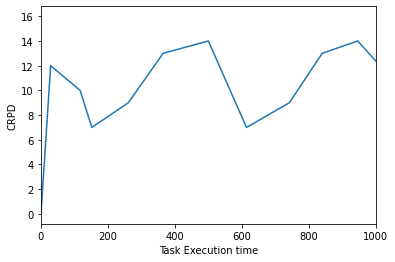

In [ ]:
# CRPD values as tasks execute

import matplotlib.pyplot as plt

plt.plot(PCt,PCoh)
plt.xlim(0, 1000)
plt.xlabel('Task Execution time')
plt.ylabel('CRPD')